In [ ]:
%pip install matplotlib
%pip install pandas
%pip install langchain_dartmouth
%pip install --quiet python-dotenv

### Removing JPAL trials from AEA

In [2]:
import pandas as pd


aea_df = pd.read_csv('trials.csv')
jpal_df = pd.read_csv('Jpale Evaluations.csv')

In [3]:
display(aea_df)

,Title,Url,Last update date,Published at,First registered on,RCT_ID,DOI Number,Primary Investigator,Status,Start date,...,Number of clusters,Attrition correlated,Total number of observations,Treatment arms,Public data,Public data url,Program files,Program files url,Post trial documents csv,Relevant papers for csv
0,Growth Vouchers,https://www.socialscienceregistry.org/trials/227,1/28/14,1/28/14 2:30,1/28/14,AEARCTR-0000227,10.1257/rct.227-1.0,Michael Sanders michael.sanders@behaviouralin...,in_development,1/27/14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Promoting Non-Cognitive Skills Through a Scien...,https://www.socialscienceregistry.org/trials/237,10/7/14,10/7/14 15:25,10/7/14,AEARCTR-0000237,10.1257/rct.237-1.0,Francisco Gallego fgallego@alum.mit.edu,on_going,12/1/12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Impact of Voucher Coupons on the Uptake of...,https://www.socialscienceregistry.org/trials/239,3/14/16,3/14/16 19:29,3/14/16,AEARCTR-0000239,10.1257/rct.239-1.0,Dean Yang deanyang@umich.edu,completed,8/1/09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abstract: Newest working paper.\nCitation: Car...
3,Collection of Delinquent Fines: Assessing the ...,https://www.socialscienceregistry.org/trials/253,2/25/14,2/25/14 17:51,2/25/14,AEARCTR-0000253,10.1257/rct.253-1.0,Donald Green dpg2110@columbia.edu,completed,1/1/12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tax Farming Redux: Experimental Evidence on In...,https://www.socialscienceregistry.org/trials/252,10/19/14,10/19/14 11:31,10/19/14,AEARCTR-0000252,10.1257/rct.252-1.0,Benjamin Olken bolken@mit.edu,completed,7/1/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10143,Delegated pricing on platforms,https://www.socialscienceregistry.org/trials/1...,2/25/25,2/25/25 10:46,2/24/25,AEARCTR-0015435,10.1257/rct.15435-1.0,Clement Minaudier clement.minaudier@city.ac.uk,on_going,2/16/25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10144,Does subsidized adult labor reduce child labor...,https://www.socialscienceregistry.org/trials/1...,2/25/25,2/25/25 10:47,2/24/25,AEARCTR-0015377,10.1257/rct.15377-1.0,Jan Averkin javerkin@ethz.ch,completed,10/9/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10145,Interest rate expectations and household decis...,https://www.socialscienceregistry.org/trials/1...,2/25/25,2/25/25 10:50,2/24/25,AEARCTR-0015436,10.1257/rct.15436-1.0,Johannes Fischer j.j.fischer@icloud.com,in_development,2/25/25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10146,Research on the Support Services for Rural Rev...,https://www.socialscienceregistry.org/trials/1...,2/28/25,2/28/25 10:41,2/25/25,AEARCTR-0015442,10.1257/rct.15442-1.0,Hui Mao maohui@snnu.edu.cn,in_development,2/25/25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reformatting first column of JPAL dataset because it is of the format AEARCT..(link) insteas of just the AEARCT code. Using regex to remove the unnecessary part (the link). Renaming column name of AEA RCT to match JPAL dataset

In [4]:
import re

jpal_df = jpal_df[jpal_df.iloc[:, 0].notna()]

def clean_aearctr(value):
    if isinstance(value, str) and value.startswith("AEARCTR"):
        return re.sub(r'(\s\(.*\))', '', value)
    return None  

jpal_df.iloc[:, 0] = jpal_df.iloc[:, 0].apply(clean_aearctr)

jpal_df = jpal_df[jpal_df.iloc[:, 0].notna()]

jpal_df.reset_index(drop=True, inplace=True)

jpal_df.rename(columns={'aea_rct_registration': 'RCT_ID'}, inplace=True)

jpal_df = jpal_df[jpal_df['timeline'].notna() & (jpal_df['timeline'] != '')]

def process_timeline(value):
    if '-' in value:  # Check if the value contains a dash
        # Split the string and take the second number
        return value.split('-')[1].strip()
    else:
        return value  # Return the single number as is

jpal_df['timeline'] = jpal_df['timeline'].apply(process_timeline)

# Step 4: Filter out rows where the number is greater than 2025
jpal_df = jpal_df[jpal_df['timeline'].astype(int) < 2025]

display(jpal_df)



,RCT_ID,body_html,context,data_link,fieldwork_by,intervention_details,intervention_type,location,notes,outcome_of_interest,...,research_papers,researchers,results_and_lessons,sample,sectors,summary,target_group,timeline,title,url
0,AEARCTR-0001284,NaN,"Despite improvements in recent years, early ch...",https://doi.org/10.3886/E100008V5,NaN,"The original ECD program, which lasted two yea...",Early childhood development; Training,Jamaica,NaN,Earnings and income; Food security and nutriti...,...,Labor market returns to an early childhood sti...,Paul Gertler,"Twenty years after the ECD intervention, stunt...",170 original program participants,"Crime, Violence, and Conflict; Education; Heal...",Governments and NGOs around the world have imp...,NaN,2008,A 20-year Follow-Up to an Early Childhood Stim...,https://www.povertyactionlab.org/evaluation/20...
2,AEARCTR-0001198,NaN,This study was implemented in partnership with...,NaN,Innovations for Poverty Action (IPA),In collaboration with Propuesta Ciudadana (PC)...,Community participation; Information; Natural ...,Peru,NaN,Transparency and accountability; Corruption an...,...,The Unintended Effects of Bottom-Up Accountabi...,NaN,Accountability workshops had mixed effects on ...,800 households from 80 communities,Political Economy and Governance,Public training sessions on democratic process...,Rural population,2016,Accountability and Transparency in the Mining ...,https://www.povertyactionlab.org/evaluation/ac...
3,AEARCTR-0008972,NaN,The stigma surrounding menstruation is widespr...,NaN,NaN,Researchers partnered with the NGO CARE to con...,Information; Social networks; Preventive healt...,NaN,NaN,Dropout and graduation; Enrollment and attenda...,...,"Menstrual Stigma, Hygiene, and Human Capital: ...",Karen Macours,The WASH interventions including sanitation in...,"2,390 schoolgirls in 140 primary and secondary...",Education; Gender; Health,Social stigma surrounding menstruation and lac...,Primary schools; Secondary schools; Students; ...,2023,Addressing Menstrual Stigma and Hygiene to Imp...,https://www.povertyactionlab.org/evaluation/ad...
4,AEARCTR-0000913,NaN,The readymade garments industry in Bangladesh ...,NaN,Innovations for Poverty Action (IPA),Researchers are evaluating the demand for a co...,Commitment devices; Financial literacy; Savings,NaN,NaN,NaN,...,NaN,Emily Breza,Study ongoing; results forthcoming.,"2,000 garment workers",Finance,Even though more people have a bank account th...,NaN,2016,Adoption of Commitment Savings Accounts Among ...,https://www.povertyactionlab.org/evaluation/ad...
5,AEARCTR-0001050,NaN,Orissa is the most highly malaria endemic stat...,https://doi.org/10.3886/E112832V1,NaN,Researchers tested whether using microloans to...,Credit; Preventive health; Pricing and fees,"Orissa, India",NaN,Malaria; Take-up of program/social service/hea...,...,(Limited) Diffusion of Health-protecting Behav...,Aprajit Mahajan; Alessandro Tarozzi,Bednet take-up and use : Microloans increased ...,"1,844 households",Finance; Health,Numerous randomized evaluations have shown tha...,Families and households,2009,Adoption of Insecticide Treated Bednets among ...,https://www.povertyactionlab.org/evaluation/ad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,AEARCTR-0005029,NaN,"In 2019, compared to neighboring countries, Ni...",NaN,NaN,Researchers partnered with a popular FSP to co...,Monetary incentives,Nigeria,NaN,Earnings and income; Consumption smoothing; Cr...,...,Instant Loans Can Lift Subjective Well-Being: ...,NaN,After an average of three months of access to ...,"1,618 people",Finance,"Short-term, high-interest digital loans via mo...",Adults,2020,Welfare Impacts of Micro-Loans in Nigeria,https://www.povertyactionlab.org/evaluation/we...
811,AEARCTR-0001186,NaN,"In Mexico, all municipalities are potentially ...",NaN,Que Funciona para el Desarrollo,"In partnership with two local NGOs, researcher...",Audits; Community participat

Not important for cleaning JPAL : Finding duplicates in both datasets 

In [5]:
jpal_rct_ids = jpal_df['RCT_ID']

seen = set()
jpal_duplicates= []
for rct_id in jpal_df['RCT_ID']:
    if rct_id in seen:
        jpal_duplicates.append(rct_id)
    else:
        seen.add(rct_id)

print(f"JPAL Duplicates: {len(jpal_duplicates)}")

seen = set()
aea_duplicates= []
for rct_id in aea_df['RCT_ID']:
    if rct_id in seen:
        aea_duplicates.append(rct_id)
    else:
        seen.add(rct_id)

print(f"AEA Duplicates: {len(aea_duplicates)}")



JPAL Duplicates: 22
AEA Duplicates: 0


In [6]:
# Removing rows similar to JPAL
aea_df = aea_df[~aea_df['RCT_ID'].isin(jpal_rct_ids)]

# Removing rows that are not completed
aea_df = aea_df[aea_df['Status'] == 'completed']

aea_df = aea_df[aea_df['Country names'].notna() & aea_df['Country names']!='']


In [8]:
aea_df

,Title,Url,Last update date,Published at,First registered on,RCT_ID,DOI Number,Primary Investigator,Status,Start date,...,Number of clusters,Attrition correlated,Total number of observations,Treatment arms,Public data,Public data url,Program files,Program files url,Post trial documents csv,Relevant papers for csv
5,Consumption Response to Credit Expansions,https://www.socialscienceregistry.org/trials/608,2/21/21,2/21/21 11:47,2/2/15,AEARCTR-0000608,10.1257/rct.608-4.1,Deniz Aydin deniztoksuaydin@gmail.com,completed,6/1/14,...,"45,307 individuals",False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
15,The Effect of Atheism Primes on Self-reported ...,https://www.socialscienceregistry.org/trials/766,7/8/15,7/8/15 5:12,7/8/15,AEARCTR-0000766,10.1257/rct.766-3.0,Johannes Haushofer haushofer@gmail.com,completed,4/25/15,...,0,False,318,110 control; 91 science priming condition; 117...,NaN,NaN,NaN,NaN,NaN,NaN
18,Examining Poverty and Anti-Social Behavior in ...,https://www.socialscienceregistry.org/trials/795,8/3/15,8/3/15 13:59,8/3/15,AEARCTR-0000795,10.1257/rct.795-1.0,Justin Abraham jrpabraham@gmail.com,completed,6/8/15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Paycheck commitment device,https://www.socialscienceregistry.org/trials/319,3/18/14,3/18/14 17:30,3/18/14,AEARCTR-0000319,10.1257/rct.319-1.0,Todd Rogers todd_rogers@hks.harvard.edu,completed,2/7/14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,When Contact Changes Minds: An Experiment on T...,https://www.socialscienceregistry.org/trials/611,1/24/15,1/24/15 20:25,1/24/15,AEARCTR-0000611,10.1257/rct.611-2.0,Michael LaCour mjlacour@gmail.com,completed,5/29/13,...,NaN,False,NaN,NaN,True,http://www.openicpsr.org/repoEntity/show/19260...,True,http://www.openicpsr.org/repoEntity/show/19260...,NaN,Abstract: Can a single conversation change min...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,The Political Economy of Progressive Tax Refor...,https://www.socialscienceregistry.org/trials/1...,2/25/25,2/25/25 9:28,2/15/25,AEARCTR-0015393,10.1257/rct.15393-1.0,Michael Best michael.best@columbia.edu,completed,5/27/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10118,Credit Where Credit is Due: Attribution and Re...,https://www.socialscienceregistry.org/trials/1...,2/20/25,2/20/25 6:37,2/18/25,AEARCTR-0015406,10.1257/rct.15406-1.0,Nicolas Cerkez nicolas.cerkez@qeh.ox.ac.uk,completed,10/10/22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10122,Does Good News Wash out the Bad? Belief Updati...,https://www.socialscienceregistry.org/trials/1...,2/19/25,2/19/25 8:45,2/12/25,AEARCTR-0015373,10.1257/rct.15373-1.0,Philip Mulder philip.mulder@wisc.edu,completed,3/25/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10129,What is the most effective format for deliveri...,https://www.socialscienceregistry.org/trials/1...,2/20/25,2/20/25 5:09,2/14/25,AEARCTR-0015387,10.1257/rct.15387-1.0,Australian Centre of Evaluation (ACE) evaluat...,completed,1/23/25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking how many of the 2603 AEA trials have completed papers

In [ ]:
# Go through both columns and find how many rows are NaN
filtered_df = aea_df[aea_df.apply(lambda row: pd.notna(row['Post trial documents csv']) or pd.notna(row['Relevant papers for csv']), axis=1)]


In [29]:
URLS_df = filtered_df[filtered_df.apply(lambda row: 'URL' in str(row['Post trial documents csv']) or 'sophie' in str(row['Relevant papers for csv']), axis=1)]

Extracting URLs into a list

In [31]:
import re
def extract_links(row):
    combined_text = str(row['Post trial documents csv'])+ ' '+str(row['Relevant papers for csv'])
    urls = re.findall(r'http[s]?://\S+', combined_text)
    unique_urls = set(urls)
    return list(unique_urls)


URLS_df['URLs'] =  URLS_df.apply(extract_links, axis=1)
URLS_df['URLs']

/tmp/ipykernel_51019/519556627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  URLS_df['URLs'] =  URLS_df.apply(extract_links, axis=1)


59          [https://pdf.usaid.gov/pdf_docs/PA00XDR4.pdf]
126     [https://documents1.worldbank.org/curated/en/7...
131     [https://geary.ucd.ie/preparingforlife/?page_i...
145     [https://pubsonline.informs.org/doi/pdf/10.128...
345     [https://doi.org/10.1016/j.jebo.2020.09.028., ...
                              ...                        
7838    [https://staging.socialscienceregistry.org/rai...
8246    [https://staging.socialscienceregistry.org/rai...
8973    [https://staging.socialscienceregistry.org/rai...
9346    [https://behaviouraleconomics.pmc.gov.au/sites...
9970    [https://staging.socialscienceregistry.org/rai...
Name: URLs, Length: 107, dtype: object

In [32]:
URLS_df.to_csv('AEA_With_URLs.csv', index=False)

In [99]:
aea_df.to_csv('AEA_Cleaned.csv', index=False)

### Normalizing country names using regex

In [109]:
def get_full_country_name(value):
    """
    Returns the full country name, removing any parenthetical content.
    - If the value is 'Private', returns 'Private'.
    - If the value is a country name possibly followed by parentheses, returns the full name without parentheses.
    """
    if pd.isna(value):
        return pd.NA
    s = str(value).strip()
    if s.lower().startswith('private'):
        return 'Private'
    # Remove anything in parentheses and trim whitespace
    s = re.sub(r"\s*\(.*?\)", "", s)  # Remove parentheses and what's inside
    return s.strip()  # Return the cleaned country name

aea_df['Country_only'] = aea_df['Country names'].apply(get_full_country_name)

print(aea_df[['Country names', 'Country_only']])

                               Country names              Country_only
5                                  Turkey ()                    Turkey
15                           Kenya (Nairobi)                     Kenya
18     United States of America (New Jersey)  United States of America
21               United States of America ()  United States of America
24     United States of America (California)  United States of America
...                                      ...                       ...
10107              Pakistan (Lahore, Punjab)                  Pakistan
10118                             Myanmar ()                   Myanmar
10122            United States of America ()  United States of America
10129                           Australia ()                 Australia
10144            Ghana (Eastern and Ashanti)                     Ghana

[2603 rows x 2 columns]


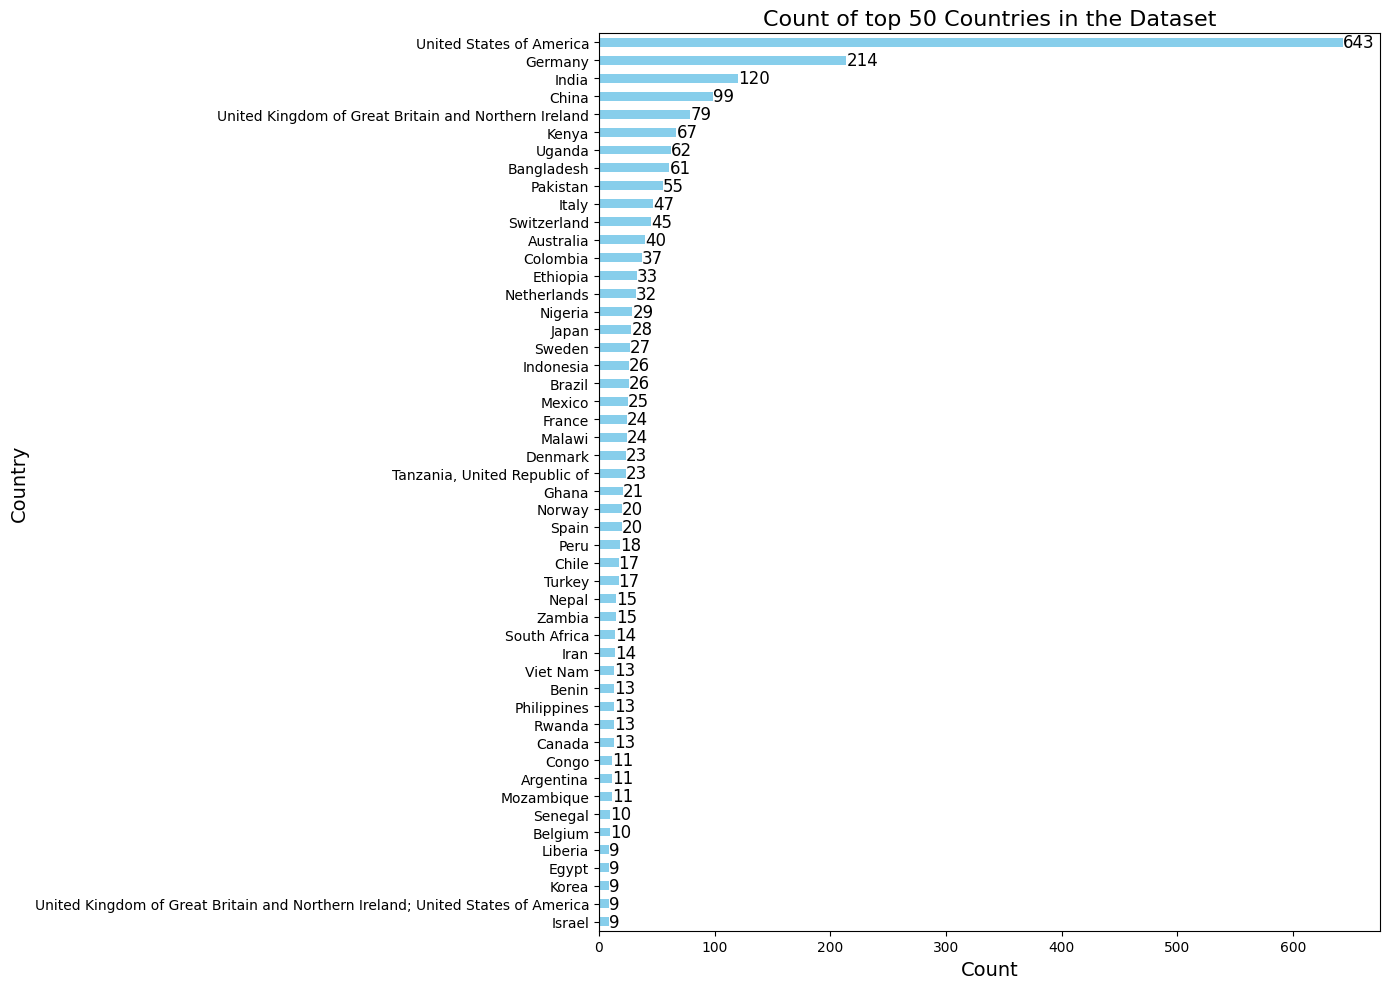

In [119]:
import matplotlib.pyplot as plt

country_counts = aea_df['Country_only'].value_counts().head(50).sort_values(ascending=True)

# 2. Create a horizontal bar plot
plt.figure(figsize=(14, 10))  # Increase the size of the plot for better spacing
country_counts.plot(kind='barh', color='skyblue')  # Use horizontal bars

# 3. Add labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Count of top 50 Countries in the Dataset', fontsize=16)

for index, value in enumerate(country_counts):
    plt.text(value, index, str(value), va='center', fontsize=12)  # va='center' aligns the text vertically

# 4. Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Normalizing locations using LLMs

In [15]:
%pip install --quiet python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [16]:
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())

True

In [24]:
DartmouthLLM.list()

[{'name': 'llama-3-8b-instruct',
  'provider': 'meta',
  'display_name': 'Llama 3 8B Instruct',
  'tokenizer': 'meta-llama/Meta-Llama-3-8B-Instruct',
  'type': 'llm',
  'capabilities': ['chat'],
  'server': 'text-generation-inference',
  'parameters': {'max_input_tokens': 8192}},
 {'name': 'llama-3-1-8b-instruct',
  'provider': 'meta',
  'display_name': 'Llama 3.1 8B Instruct',
  'tokenizer': 'meta-llama/Llama-3.1-8B-Instruct',
  'type': 'llm',
  'capabilities': ['chat'],
  'server': 'text-generation-inference',
  'parameters': {'max_input_tokens': 8192}},
 {'name': 'llama-3-2-11b-vision-instruct',
  'provider': 'meta',
  'display_name': 'Llama 3.2 11B Vision Instruct',
  'tokenizer': 'meta-llama/Llama-3.2-11B-Vision-Instruct',
  'type': 'llm',
  'capabilities': ['chat', 'vision'],
  'server': 'text-generation-inference',
  'parameters': {'max_input_tokens': 127999}},
 {'name': 'codellama-13b-instruct-hf',
  'provider': 'meta',
  'display_name': 'CodeLlama 13B Instruct HF',
  'tokenize

In [53]:
aea_df = pd.read_csv("AEA_Cleaned.csv")

In [43]:
from langchain_dartmouth.llms import ChatDartmouth


def normalize_country(location):
    llm = ChatDartmouth(model_name="llama-3-2-11b-vision-instruct", return_full_text=True)
    response = llm.invoke(f""" 

    <Instruction>
        Your job is to help normalize location data and respond with only the answer reuqested and nothing else. You will be given an input with a Country name followed by parentheses and either the region within the country or the continent. Accordingly respond with a comma seperated normalized answer for the region. If you don't know the answer, don't make up information. If there are spelling errors, correct them. Ignore continents. If inputs don't have regions, just respond with country names too.
        Examples:
            Input: Kenya (Nairobi)
            Output: Nairobi, Kenya
            Input: United States of America (New Jersey)
            Output: New Jersey, United States of America
            Input: United States of America ()
            Output: United States of America
            Input: Peru (Entire country)
            Output: Peru
            Input: Ghana (Upper East, North East, Upper West, Savannah)
            Output: Upper East, North East, Upper West, Savannah districts of Ghana

    <Input> {location} </Input>
    Return only the output for the above input!
    </Instruction>
    """)
    return response.content


In [68]:
aea_df['Location'] = aea_df['Country names'].apply(normalize_country)

In [69]:
aea_df

,Title,Url,Last update date,Published at,First registered on,RCT_ID,DOI Number,Primary Investigator,Status,Start date,...,Attrition correlated,Total number of observations,Treatment arms,Public data,Public data url,Program files,Program files url,Post trial documents csv,Relevant papers for csv,Location
0,Consumption Response to Credit Expansions,https://www.socialscienceregistry.org/trials/608,2/21/21,2/21/21 11:47,2/2/15,AEARCTR-0000608,10.1257/rct.608-4.1,Deniz Aydin deniztoksuaydin@gmail.com,completed,6/1/14,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Turkey
1,The Effect of Atheism Primes on Self-reported ...,https://www.socialscienceregistry.org/trials/766,7/8/15,7/8/15 5:12,7/8/15,AEARCTR-0000766,10.1257/rct.766-3.0,Johannes Haushofer haushofer@gmail.com,completed,4/25/15,...,False,318,110 control; 91 science priming condition; 117...,NaN,NaN,NaN,NaN,NaN,NaN,"Nairobi, Kenya"
2,Examining Poverty and Anti-Social Behavior in ...,https://www.socialscienceregistry.org/trials/795,8/3/15,8/3/15 13:59,8/3/15,AEARCTR-0000795,10.1257/rct.795-1.0,Justin Abraham jrpabraham@gmail.com,completed,6/8/15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New Jersey, United States of America"
3,Paycheck commitment device,https://www.socialscienceregistry.org/trials/319,3/18/14,3/18/14 17:30,3/18/14,AEARCTR-0000319,10.1257/rct.319-1.0,Todd Rogers todd_rogers@hks.harvard.edu,completed,2/7/14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America
4,When Contact Changes Minds: An Experiment on T...,https://www.socialscienceregistry.org/trials/611,1/24/15,1/24/15 20:25,1/24/15,AEARCTR-0000611,10.1257/rct.611-2.0,Michael LaCour mjlacour@gmail.com,completed,5/29/13,...,False,NaN,NaN,True,http://www.openicpsr.org/repoEntity/show/19260...,True,http://www.openicpsr.org/repoEntity/show/19260...,NaN,Abstract: Can a single conversation change min...,"California, United States of America"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,The Political Economy of Progressive Tax Refor...,https://www.socialscienceregistry.org/trials/1...,2/25/25,2/25/25 9:28,2/15/25,AEARCTR-0015393,10.1257/rct.15393-1.0,Michael Best michael.best@columbia.edu,completed,5/27/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lahore, Punjab districts of Pakistan"
2599,Credit Where Credit is Due: Attribution and Re...,https://www.socialscienceregistry.org/trials/1...,2/20/25,2/20/25 6:37,2/18/25,AEARCTR-0015406,10.1257/rct.15406-1.0,Nicolas Cerkez nicolas.cerkez@qeh.ox.ac.uk,completed,10/10/22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Myanmar
2600,Does Good News Wash out the Bad? Belief Updati...,https://www.socialscienceregistry.org/trials/1...,2/19/25,2/19/25 8:45,2/12/25,AEARCTR-0015373,10.1257/rct.15373-1.0,Philip Mulder philip.mulder@wisc.edu,completed,3/25/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America
2601,What is the most effective format for deliveri...,https://www.socialscienceregistry.org/trials/1...,2/20/25,2/20/25 5:09,2/14/25,AEARCTR-0015387,10.1257/rct.15387-1.0,Australian Centre of Evaluation (ACE) evaluat...,completed,1/23/25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia


In [71]:
aea_df.to_csv("AEA_Dataset_Location_Normalized.csv", index=False)

### Interventions

In [76]:
interventions = [
    "Administrative reform",
    "Alternative dispute resolution",
    "Alternative work arrangements",
    "Apprenticeships and on-the-job training",
    "Audits",
    "Behavioral economics",
    "Business skills training",
    "COVID-19 response",
    "Cash transfers",
    "Certification",
    "Child care",
    "Coaching and mentoring",
    "Cognitive behavioral therapy",
    "Commitment devices",
    "Community health workers",
    "Community monitoring",
    "Community participation",
    "Community policing",
    "Community-driven development",
    "Computer-assisted learning",
    "Conditional cash transfers",
    "Consulting",
    "Consumer protection",
    "Contracts",
    "Cookstoves",
    "Credit",
    "Credit or debit cards",
    "Crime prevention",
    "Defaults",
    "Deworming",
    "Digital and mobile",
    "Disorder policing",
    "Diversifying security institutions",
    "Diversity quotas",
    "Early childhood development",
    "Early childhood education",
    "Edutainment",
    "Employment",
    "Empowerment training",
    "Energy efficiency",
    "Engaging men in gender norms change",
    "Export support",
    "Extension services",
    "Fertilizer and agricultural inputs",
    "Financial literacy",
    "Gender quotas",
    "Graduation approach",
    "Hard skills",
    "Health care delivery",
    "Hot spots policing",
    "Housing and neighborhoods",
    "Improved seeds",
    "In-kind transfers",
    "Incentives",
    "Information",
    "Infrastructure",
    "Insurance",
    "Intergroup/social contact",
    "Job counseling",
    "Job fairs",
    "Legal assistance",
    "Legal reform",
    "Media",
    "Mental health",
    "Monetary incentives",
    "Monitoring",
    "Natural resource management",
    "Non-monetary incentives",
    "Norms change",
    "Nudges and reminders",
    "Online learning",
    "Parental engagement",
    "Pedagogical innovation",
    "Performance-based pay",
    "Police skills training",
    "Policing",
    "Post-harvest storage",
    "Preventive health",
    "Pricing",
    "Pricing and fees",
    "Psychosocial support",
    "Re-entry programming",
    "Recruitment and hiring",
    "Regulation enforcement programs",
    "Renewable energy",
    "Risk mitigation",
    "Savings",
    "Scholarships",
    "School choice",
    "School-based inputs",
    "Simplification",
    "Social networks",
    "Social protection",
    "Soft skills",
    "Student motivation",
    "Subsidies",
    "Sustainable farming",
    "Tailored instruction",
    "Targeting",
    "Targeting the ultra poor model",
    "Technology",
    "Tracking",
    "Tracking and remedial education",
    "Training",
    "Transitional justice",
    "Transportation",
    "Unconditional cash transfers",
    "Vocational training (TVET)",
    "Vouchers",
    "Water, sanitation, and hygiene"
]

In [75]:
ChatDartmouthCloud.list()

[{'name': 'anthropic.claude-3-5-haiku-20241022',
  'provider': 'anthropic',
  'type': 'llm',
  'capabilities': ['chat'],
  'server': 'dartmouth-chat',
  'parameters': {}},
 {'name': 'anthropic.claude-3-7-sonnet-20250219',
  'provider': 'anthropic',
  'type': 'llm',
  'capabilities': ['chat', 'vision'],
  'server': 'dartmouth-chat',
  'parameters': {}},
 {'name': 'google_genai.gemini-2.0-flash-001',
  'provider': 'google_genai',
  'type': 'llm',
  'capabilities': ['chat', 'vision'],
  'server': 'dartmouth-chat',
  'parameters': {}},
 {'name': 'google_genai.gemini-1.5-pro-002',
  'provider': 'google_genai',
  'type': 'llm',
  'capabilities': ['chat', 'vision'],
  'server': 'dartmouth-chat',
  'parameters': {}},
 {'name': 'mistral.pixtral-large-2411',
  'provider': 'mistral',
  'type': 'llm',
  'capabilities': ['chat', 'vision'],
  'server': 'dartmouth-chat',
  'parameters': {}},
 {'name': 'mistral.mistral-small-2503',
  'provider': 'mistral',
  'type': 'llm',
  'capabilities': ['chat', '

In [77]:
aea_df["Intervention_normalized"]  = "NaN"

In [88]:
from langchain_dartmouth.llms import ChatDartmouthCloud

ChatDartmouthCloud.list()
gemini = ChatDartmouthCloud(model_name="google_genai.gemini-2.0-flash-001")

def normalize_intervention(value):
    prompt=f"""Using the input, pick appropriate categories for intervention types for the study. Average number of intervention types is 2-3 and can go upto 5. It must be very relevant to the intervention type and only from the list given below
    
    input: {value}
    list of interventions: {interventions}
    
    Crucial: Only return the intervention types seperated by a ";" delimiter like "<Intervention 1>; <Intervention 2>"
    """
    response = gemini.invoke(prompt)
    return response.content.strip

def get_intervention_or_abstract(row):
    if pd.isna(row['Intervention']) or row['Intervention'].strip() == "":
        value = row['Abstract']
    else:
        value = row['Intervention']

    return normalize_intervention(value)

aea_df['Intervention_normalized'] = aea_df.apply(get_intervention_or_abstract, axis=1)


In [86]:
pd.set_option('display.max_colwidth', None)
display(df[['Abstract','Intervention','Intervention_normalized']])

,Abstract,Intervention,Intervention_normalized
0,"This paper reports the results of a large-scale field experiment to study how personal consumption expenditures respond to credit shocks. I design a controlled trial implemented at a large European retail bank in Turkey that constructs a randomized credit limit increase, on average, $1,600, or 145% of average monthly income. The intervention deliberately and temporarily pauses the internal underwriting process for a randomly selected subset of 45,307 customers preapproved for a lender-initiated credit limit increase, creating a counterfactual withheld from receiving the limit increases for nine months. I then use the experimental shock in conjunction with rich administrative data on spending, contract choice, and balance sheets to track the impulse responses and estimate average and heterogeneous treatment effects—marginal propensities to borrow and spend—by comparing cardholders who receive the credit line extension at different times.","This paper reports the results of a large-scale field experiment to study how personal consumption expenditures respond to credit shocks. I design a controlled trial implemented at a large European retail bank in Turkey that constructs a randomized credit limit increase, on average, $1,600, or 145% of average monthly income. The intervention deliberately and temporarily pauses the internal underwriting process for a randomly selected subset of 45,307 customers preapproved for a lender-initiated credit limit increase, creating a counterfactual withheld from receiving the limit increases for nine months. I then use the experimental shock in conjunction with rich administrative data on spending, contract choice, and balance sheets to track the impulse responses and estimate average and heterogeneous treatment effects—marginal propensities to borrow and spend—by comparing cardholders who receive the credit line extension at different times.",Credit; Consumer protection; Financial literacy\n
1,"In recent years, atheism has grown in popularity, partly inspired by the rise to prominence of a group of public intellectuals called the “New Atheists” who argue against religion in public fora. Does exposure to the concept of atheism affect religiosity? We test in a laboratory study in Kenya whether exposure to arguments of the style made by the “New Atheists” impact selfreported and implicit religiosity measures. The present documents outlines the analyses to be conducted to answer this question.","Manipulations\r\nThe primes used for the study consist of short video presentations (in English) and a writing task in which subjects are asked to summarize the main point of the primes. There are three conditions: emotional anti-religious argument, rational anti-religious argument, and control. Each prime is approximately 4 minutes long and consists of a speaker making various points about religion, or in the case of the control, about vegetables. The speaker is the same Kenyan narrator in all three videos. Bullet points summarizing the main arguments appear on the screen, accompanying the auditory presentation by the speaker. In the emotional condition, the speaker argues that any God must be very cruel if he allows so many people in the world to suffer, concluding that it is unlikely that God exists. In the rational condition, the speaker argues that the existence of God is unnecessary to explain the universe given our scientific knowledge. In the control condition, the same speaker instead argues that it is important to eat vegetables every day. After viewing the video presentations, participants are asked to summarize the main arguments in their own words by typing into a text box on their screen and then asked a series of questions to ensure comprehension. we will include analyses restricted based on comprehension as described below. The primes were randomly assigned within each session, with approximately 1/3 of participants in each condition. The setup 

In [89]:
aea_df.to_csv("AEA_interventions_normalized.csv")

In [91]:
import pandas as pd
from tqdm import tqdm

gemini = ChatDartmouthCloud(model_name="google_genai.gemini-2.0-flash-001")

# Assume `aea_df` is already loaded, for example:
# aea_df = pd.read_json("jpale_evaluations.json")

def build_context_text(row):
    parts = [
        row.get("Abstract", ""),
        row.get("policy_issue", ""),
        row.get("context", ""),
        row.get("results_and_lessons", ""),
        row.get("intervention_details", "")
    ]
    return "\n\n".join(part.strip() for part in parts if isinstance(part, str) and part).strip()

def ask_gemini(prompt):
    try:
        messages = [
            {
                "role": "system",
                "content": "You are an experienced researcher working to reduce poverty by ensuring that policy is informed by scientific evidence. You conduct randomized impact evaluations to answer critical questions in the fight against poverty."
            },
            {
                "role": "user",
                "content": prompt
            }
        ]
        response = gemini.chat(messages)
        return response["content"] if isinstance(response, dict) and "content" in response else str(response)
    except Exception as e:
        print(f"Model call failed: {e}")
        return "Error"

# Process only first 10 records for testing
results = []
for idx, row in tqdm(aea_df.iterrows(), total=min(5, len(aea_df)), desc="Analyzing evaluations"):
    if idx == 5:
        break

    context = build_context_text(row)
    if not context:
        continue

    output = {"url": row.get("url", "")}

    # Q1: Was the intervention successful?
    q1_prompt = (
        f"Based on the following text, was the intervention successful? "
        f"Return only 'Yes' or 'No' and then the brief text evidence.\n\n"
        f"{context}"
    )
    output["successful"] = ask_gemini(q1_prompt)

    # Q2: Magnitude of the effect
    q2_prompt = (
        f"Based on the following text, what is the magnitude of the main effects "
        f"(i.e., the point estimates for key outcomes)? If available, extract them. "
        f"Also include the specific text you based your answer on.\n\n"
        f"{context}"
    )
    output["magnitude"] = ask_gemini(q2_prompt)

    # Q3: Cost-benefit analysis mention
    q3_prompt = (
        f"Based on the following text, is there any mention of a cost-benefit analysis? "
        f"If yes, extract the full discussion or sentence.\n\n"
        f"{context}"
    )
    output["cost_benefit"] = ask_gemini(q3_prompt)

    results.append(output)

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df.head()


Analyzing evaluations: 100%|██████████| 5/5 [00:00<00:00, 49.50it/s]


""


In [92]:
results_df

""
